# Regressão Softmax com dados do MNIST utilizando gradiente descendente estocástico por minibatches

O objetivo deste notebook é ilustrar
- o uso do gradiente estocástico por mini-batchs
- utilizando as classes Dataset e DataLoater.

A apresentação da perda nos gráficos é um pouco diferente da usual, mostrando a perda de cada um dos vários minibatches dentro de cada época, de forma que as épocas são apresentadas com valores fracionários.

## Importação das bibliotecas

In [23]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.autograd import Variable
from torch.utils.data import DataLoader

import torchvision
from torchvision.datasets import MNIST

## Dataset e dataloader

### Definição do tamanho do minibatch

In [24]:
batch_size = 100

### Carregamento, criação dataset e do dataloader

In [25]:
dataset_dir = 'MNIST/'

dataset_train = MNIST(dataset_dir, train=True, download=True,
                      transform=torchvision.transforms.ToTensor())

loader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)

print('Número de minibatches de trenamento:', len(loader_train))

x_train, y_train = next(iter(loader_train))
print("\nDimensões dos dados de um minibatch:", x_train.size())
print("Valores mínimo e máximo dos pixels: ", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:         ", type(x_train))
print("Tipo das classes das imagens:       ", type(y_train))

Número de minibatches de trenamento: 600

Dimensões dos dados de um minibatch: torch.Size([100, 1, 28, 28])
Valores mínimo e máximo dos pixels:  tensor(0.) tensor(1.)
Tipo dos dados das imagens:          <class 'torch.Tensor'>
Tipo das classes das imagens:        <class 'torch.Tensor'>


### Usando todas as amostras do MNIST

Neste exemplo utilizaremos todas as amostras de treinamento.

In [26]:
print('Número de minibatches de trenamento:', len(loader_train))
n_batches_train = len(loader_train)
total_samples = dataset_train.train_data.size(0)

Número de minibatches de trenamento: 600


/usr/local/lib/python3.12/dist-packages/torchvision/datasets/mnist.py:76: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


## Modelo

In [44]:
model = torch.nn.Linear(28*28, 10)

In [28]:
x = torch.ones(28*28).reshape(1, 784)
print(x.shape)
predict = model(x)
predict

torch.Size([1, 784])


tensor([[ 0.3883,  0.0329,  0.5946, -0.6274, -0.6023, -0.1771,  0.3147, -0.4070,
         -0.2946,  1.3495]], grad_fn=<AddmmBackward0>)

In [29]:
x_train, y_train = next(iter(loader_train))
pred = model(x_train.view(-1, 784))
pred



tensor([[ 6.2087e-02, -1.5071e-01,  1.4492e-01, -6.8409e-02,  1.1396e-01,
          2.2055e-02, -2.9621e-02, -2.4181e-01, -1.3528e-02,  3.0860e-01],
        [ 1.2051e-02,  5.1084e-01,  5.1827e-01,  1.9332e-01, -7.8444e-03,
          1.7716e-01,  2.6856e-01,  1.7733e-02,  1.3618e-01,  1.3542e-01],
        [ 4.7896e-01, -7.6279e-02,  1.0301e-01, -1.9671e-01,  3.7640e-02,
         -2.2079e-03,  3.0248e-01, -2.3924e-01,  1.0241e-01,  2.0656e-01],
        [ 1.3591e-01, -3.0937e-01,  1.8615e-01, -1.2847e-02,  2.5760e-01,
         -1.1927e-01,  1.6921e-01, -3.4323e-01, -1.3901e-01,  3.7586e-01],
        [ 1.7210e-02,  2.7402e-01,  4.1861e-01, -3.1431e-01, -1.2970e-01,
          3.3659e-01,  3.4636e-01, -1.6853e-01,  3.8919e-01,  3.0094e-01],
        [ 1.0668e-01,  1.8301e-03,  3.5116e-01, -3.2637e-01,  2.8705e-01,
         -1.3329e-01,  1.6266e-01,  7.4687e-03, -1.3785e-02,  5.0302e-01],
        [ 1.3544e-01, -2.6226e-01,  6.7442e-02, -2.8548e-01, -9.1866e-03,
         -5.8992e-02,  4.0780e-0

## Treinamento

### Inicialização dos parâmetros

In [45]:
n_epochs = 5
learningRate = 0.5

# Utilizaremos CrossEntropyLoss como função de perda
criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

### Laço de treinamento dos parâmetros

In [46]:
epochs = []
losses = []
losses_epoch = []
best_loss_epoch = 100

total_trained_samples = 0
for i in range(n_epochs):
    for k,(x_train, y_train) in enumerate(loader_train):
        # Transforma a entrada para uma dimensão
        inputs = x_train.view(-1, 28 * 28)
        # predict da rede
        outputs = model(inputs)

        # calcula a perda
        loss = criterion(outputs, Variable(y_train))

        # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_trained_samples += x_train.size(0)
        epochs.append(total_trained_samples / total_samples)
        losses.append(loss.data)
        print(f"Época: {i+1}/{n_epochs}, batch: {k+1}/{n_batches_train}")
        if loss.data < best_loss_epoch:
            best_loss_epoch = loss.data
    losses_epoch.append(best_loss_epoch)

In [47]:
print('Final loss:', loss.data)

Final loss: tensor(0.2505)


### Visualizando gráfico de perda durante o treinamento

Text(0.5, 0, 'época')

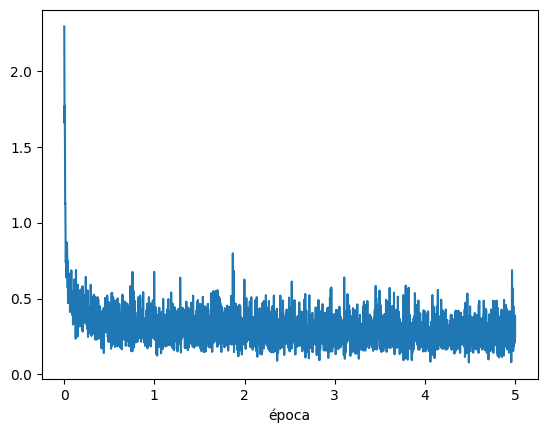

In [48]:
plt.plot(epochs, losses)
plt.xlabel('época')

### Visualização usual da perda, somente no final de cada minibatch

Text(0.5, 0, 'época')

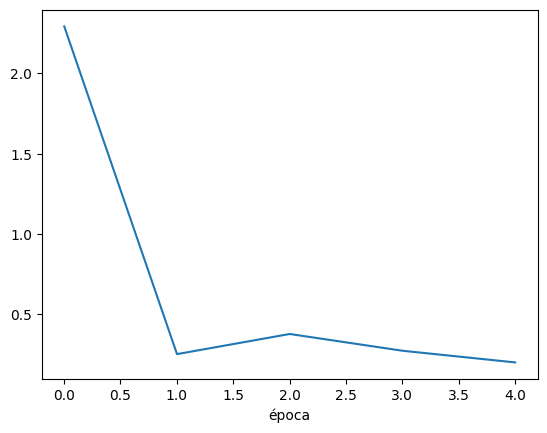

In [53]:
plt.plot(epochs[:5 * n_batches_train + 1:n_batches_train], losses[:5 * n_batches_train+1:n_batches_train])
plt.xlabel('época')

Text(0.5, 0, 'época')

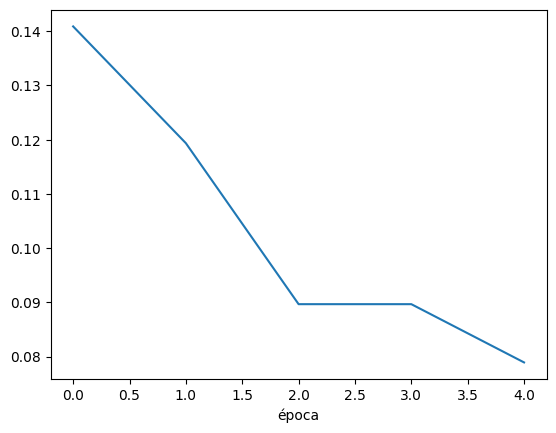

In [51]:
plt.plot(range(n_epochs), losses_epoch)
plt.xlabel('época')

# Atividades

## Perguntas

1. Qual é o tamanho do mini-batch?
    R: 100
2. Em uma época, quantos mini-batches existem?
    R: 60.000/100 = 600
3. Qual é a definição de época?
    R: Se refere a uma passagem completa de todo o conjunto de dados de treinamento através do algoritmo de treinamento.

## Exercícios


1. Coloque um print no final de cada minibatch, no mesmo estilo do print do final de época, no seguinte estilo:
    - Época: 1/4, batch: 600
2. Altere o tamanho de minibatch (batch_size) algumas vezes, refaça o treinamento, e compare no gráfico abaixo a queda da perda para cada tamanho de minibatch.

##1

In [54]:
epochs = []
losses = []
losses_epoch = []
best_loss_epoch = 100

total_trained_samples = 0
for i in range(n_epochs):
    for k,(x_train, y_train) in enumerate(loader_train):
        # Transforma a entrada para uma dimensão
        inputs = x_train.view(-1, 28 * 28)
        # predict da rede
        outputs = model(inputs)

        # calcula a perda
        loss = criterion(outputs, Variable(y_train))

        # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_trained_samples += x_train.size(0)
        epochs.append(total_trained_samples / total_samples)
        losses.append(loss.data)
        print(f"Época: {i+1}/{n_epochs}, batch: {k+1}/{n_batches_train}")
        if loss.data < best_loss_epoch:
            best_loss_epoch = loss.data
    losses_epoch.append(best_loss_epoch)

Época: 1/5, batch: 1/600
Época: 1/5, batch: 2/600
Época: 1/5, batch: 3/600
Época: 1/5, batch: 4/600
Época: 1/5, batch: 5/600
Época: 1/5, batch: 6/600
Época: 1/5, batch: 7/600
Época: 1/5, batch: 8/600
Época: 1/5, batch: 9/600
Época: 1/5, batch: 10/600
Época: 1/5, batch: 11/600
Época: 1/5, batch: 12/600
Época: 1/5, batch: 13/600
Época: 1/5, batch: 14/600
Época: 1/5, batch: 15/600
Época: 1/5, batch: 16/600
Época: 1/5, batch: 17/600
Época: 1/5, batch: 18/600
Época: 1/5, batch: 19/600
Época: 1/5, batch: 20/600
Época: 1/5, batch: 21/600
Época: 1/5, batch: 22/600
Época: 1/5, batch: 23/600
Época: 1/5, batch: 24/600
Época: 1/5, batch: 25/600
Época: 1/5, batch: 26/600
Época: 1/5, batch: 27/600
Época: 1/5, batch: 28/600
Época: 1/5, batch: 29/600
Época: 1/5, batch: 30/600
Época: 1/5, batch: 31/600
Época: 1/5, batch: 32/600
Época: 1/5, batch: 33/600
Época: 1/5, batch: 34/600
Época: 1/5, batch: 35/600
Época: 1/5, batch: 36/600
Época: 1/5, batch: 37/600
Época: 1/5, batch: 38/600
Época: 1/5, batch: 39

## Conclusões sobre os experimentos deste notebook
